In [30]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df = pd.read_csv("amazonreviews.tsv", sep='\t')
df.head()


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [32]:
df.isnull().sum()


label     0
review    0
dtype: int64

In [33]:
df = df.dropna(subset=['review'])


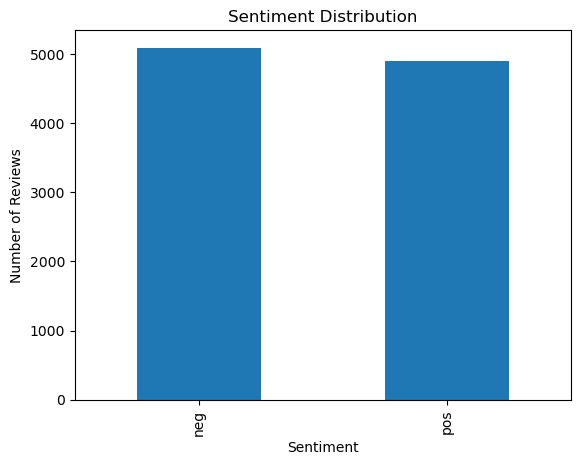

In [34]:
df['label'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [35]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)


In [36]:
df['clean_review'] = df['review'].apply(preprocess_text)
df.head()


,label,review,clean_review
0,pos,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,pos,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,pos,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...
3,pos,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


In [37]:
df['sentiment'] = df['label'].map({'pos': 1, 'neg': 0})


In [38]:
positive_reviews = df[df['label'] == 'pos']['clean_review']
negative_reviews = df[df['label'] == 'neg']['clean_review']


In [39]:
pos_words = " ".join(positive_reviews).split()
neg_words = " ".join(negative_reviews).split()


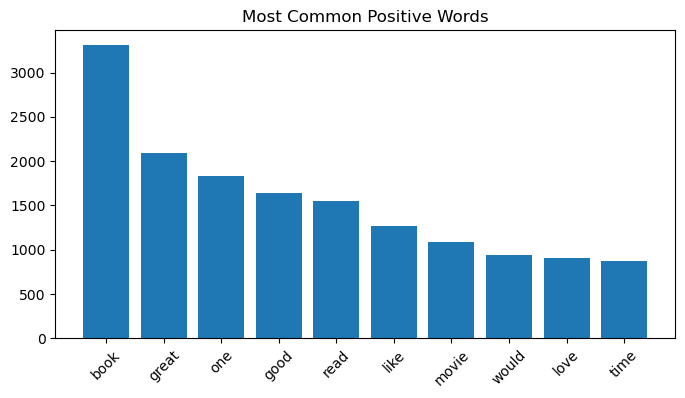

In [40]:
pos_common = Counter(pos_words).most_common(10)
words, counts = zip(*pos_common)

plt.figure(figsize=(8,4))
plt.bar(words, counts)
plt.title("Most Common Positive Words")
plt.xticks(rotation=45)
plt.show()


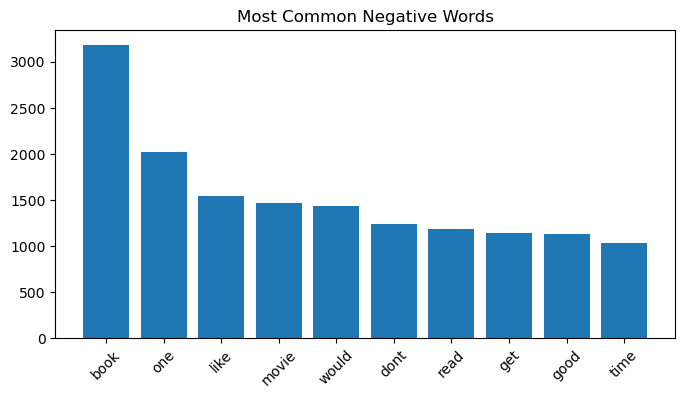

In [41]:
neg_common = Counter(neg_words).most_common(10)
words, counts = zip(*neg_common)

plt.figure(figsize=(8,4))
plt.bar(words, counts)
plt.title("Most Common Negative Words")
plt.xticks(rotation=45)
plt.show()


In [42]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review'])
y = df['sentiment']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [45]:
y_pred_lr = log_reg_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.845
Logistic Regression F1 Score: 0.8403707518022657


In [46]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [47]:
y_pred_svc = svc_model.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC F1 Score:", f1_score(y_test, y_pred_svc))


SVC Accuracy: 0.8355
SVC F1 Score: 0.8290909090909091


In [48]:
cv_lr = cross_val_score(
    log_reg_model,
    X,
    y,
    cv=5,
    scoring='f1'
)

print("Logistic Regression CV F1 Scores:", cv_lr)
print("Mean CV F1 Score:", cv_lr.mean())


Logistic Regression CV F1 Scores: [0.85858586 0.8293183  0.82261411 0.8290469  0.84836272]
Mean CV F1 Score: 0.8375855767639371


In [49]:
cv_svc = cross_val_score(
    svc_model,
    X,
    y,
    cv=5,
    scoring='f1'
)

print("SVC CV F1 Scores:", cv_svc)
print("Mean CV F1 Score:", cv_svc.mean())


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC CV F1 Scores: [0.84124553 0.80954799 0.81168492 0.81818182 0.84359233]
Mean CV F1 Score: 0.8248505201725141


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
#Conclusion:

#In this project, sentiment analysis was performed on Amazon customer reviews.
#Explicit handling of missing values and text preprocessing were carried out.
#Exploratory visualizations such as sentiment distribution and frequent word plots
#helped understand customer feedback patterns.
#TF-IDF features were used with Logistic Regression and SVC models.
#Model performance was evaluated using accuracy, F1-score, and cross-validation,
#demonstrating robust and reliable sentiment classification.
